In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Finance profile exploration

Exploring the possible connection between the finance-related variables of an applicant which might provide insights into fraudulent activities.

Following are the variables identified as finance-related:
+ `income`: directly related to applicant's finances
+ `intended_balcon_amount`: initial transfer amount might reflect applicant's financial status
+ `payment_type`: certain type of credit card payment plan could indicate financial standing
+ `employment_status`: directly related to applicant's finances
+ `credit_risk_score`: higher risk score might suggest good credibility which might stem from certain financial standing
+ `housing_status`: directly related to applicant's finances
+ `has_other_cards`: multiple cards could indicate higher spending > higher financial status
+ `proposed_credit_limit`: credit limit could indicate spending power > financial status
+ `customer_age`: certain age might reflect certain financial status

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./data/Base.csv')

df['fraud_bool'] = df['fraud_bool'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['employment_status'] = df['employment_status'].astype('category')
df['email_is_free'] = df['email_is_free'].astype('category')
df['housing_status'] = df['housing_status'].astype('category')
df['phone_home_valid'] = df['phone_home_valid'].astype('category')
df['phone_mobile_valid'] = df['phone_mobile_valid'].astype('category')
df['has_other_cards'] = df['has_other_cards'].astype('category')
df['foreign_request'] = df['foreign_request'].astype('category')
df['source'] = df['source'].astype('category')
df['device_os'] = df['device_os'].astype('category')

In [3]:
fraud = df[df['fraud_bool'] == 1]
not_fraud = df[df['fraud_bool'] == 0]

### Undersampling

This is to increase computation speed for exploration.

Undersampling is performed on non-fraudulent date to reduce ratio of fraud-to-non-fraud to 1:5

In [4]:
undersampled_not_fraud = not_fraud.sample(n=len(fraud)*5, random_state=42)

Visualisation to check distribution of undersampled data

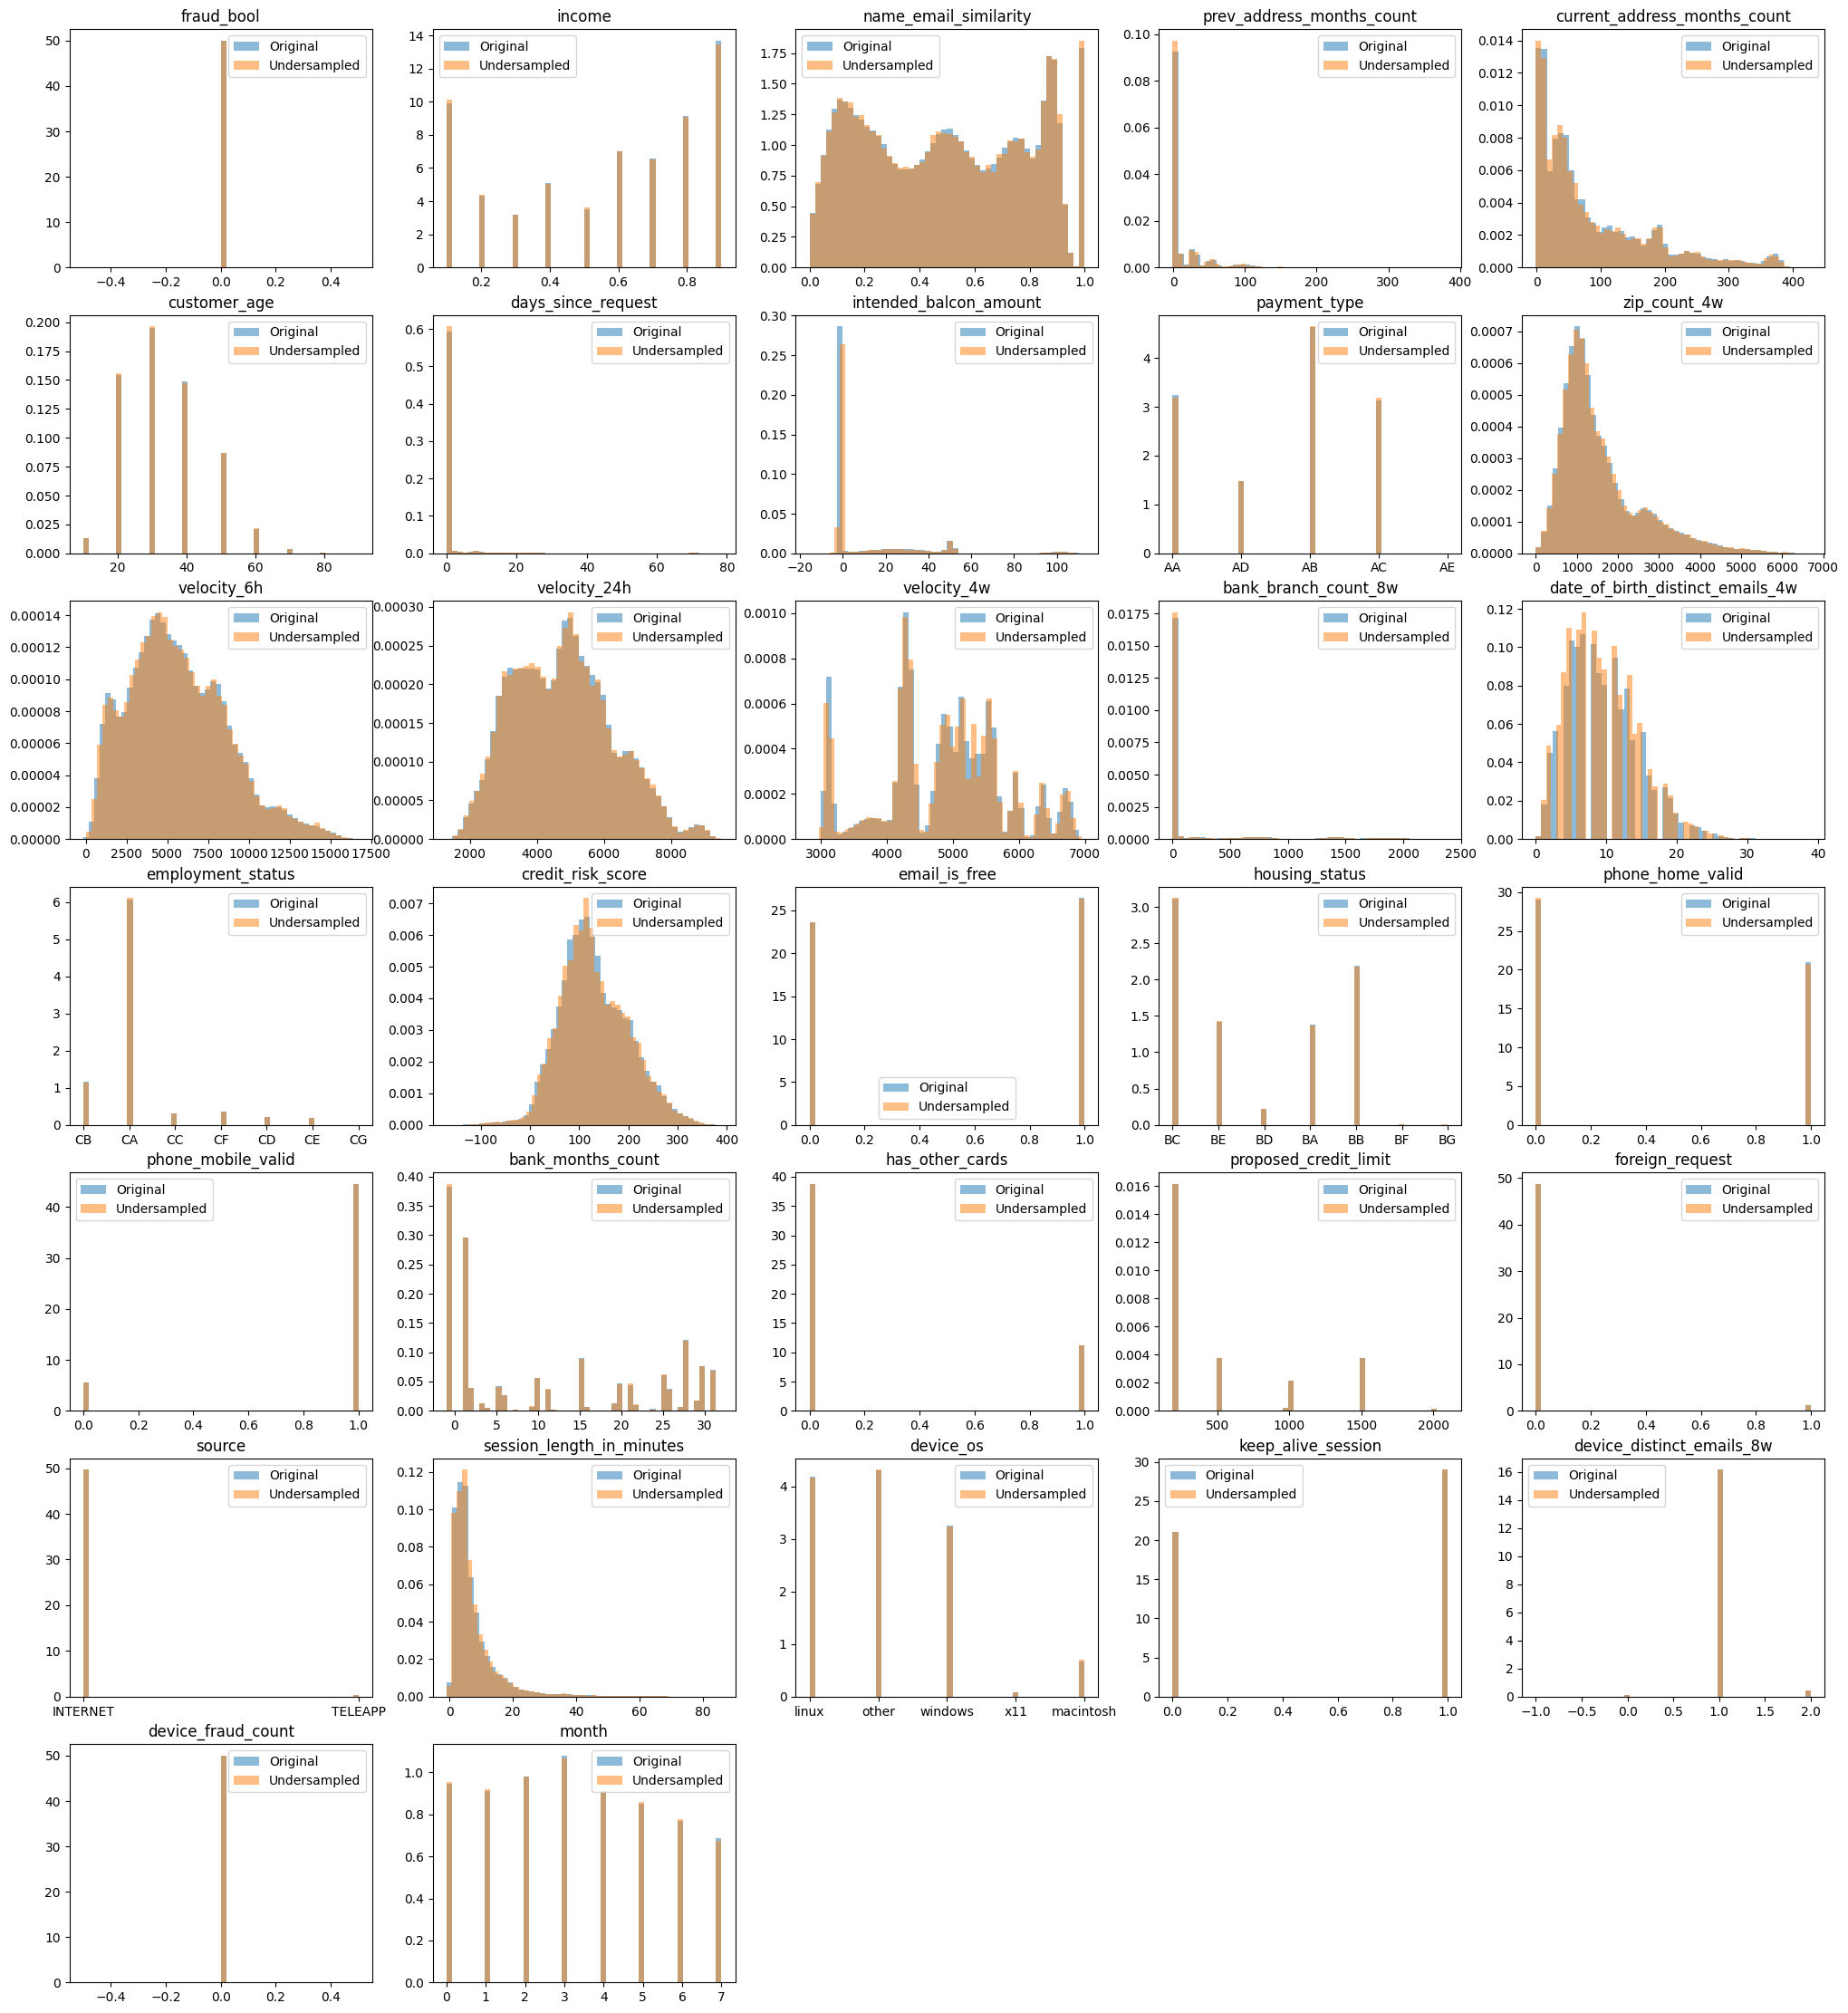

In [5]:
plt.figure(figsize=(25, 4 * ((len(undersampled_not_fraud.columns) // 5 ) + 1)))

for i, col in enumerate(undersampled_not_fraud.columns):
    plt.subplot(((len(undersampled_not_fraud.columns) // 5 ) + 1) , 5, i+1)
    plt.hist(not_fraud[col], bins=50, alpha=0.5, label='Original', density=True)
    plt.hist(undersampled_not_fraud[col], bins=50, alpha=0.5, label='Undersampled', density=True)
    plt.title(col)
    plt.legend()

In [6]:
financial_fraud = fraud.loc[:, 
    [
        'income',
        'intended_balcon_amount',
        'payment_type',
        'employment_status',
        'credit_risk_score',
        'housing_status',
        'has_other_cards',
        'proposed_credit_limit',
        'customer_age' ## age related to financial status?
    ]
]

financial_not_fraud = undersampled_not_fraud.loc[:, 
    [
        'income',
        'intended_balcon_amount',
        'payment_type',
        'employment_status',
        'credit_risk_score',
        'housing_status',
        'has_other_cards',
        'proposed_credit_limit',
        'customer_age' ## age related to financial status?
    ]
]

In [7]:
financial_fraud.shape, financial_not_fraud.shape

((11029, 9), (55145, 9))

### K means clustering

In [8]:
# one hot encoding for 'payument_type' and 'housing_status' + separate label 'employment_status'
financial_info = pd.get_dummies(financial_not_fraud, columns=['payment_type', 'housing_status']).drop(columns=['employment_status'])
financial_info_label = financial_not_fraud['employment_status']

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

clusters = []
inertia_values = []
for k in range(3, 11):
    # Specify the number of clusters (k)

    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to your data
    kmeans.fit(financial_info)

    # Get cluster labels for each data point
    cluster_labels = kmeans.labels_
    clusters.append(cluster_labels)
    inertia_values.append(kmeans.inertia_)

# Display the DataFrame with cluster labels
print(clusters)

c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 2, 0, 0]), array([0, 0, 0, ..., 2, 0, 0]), array([4, 4, 4, ..., 3, 4, 1]), array([0, 0, 0, ..., 2, 0, 5]), array([1, 1, 5, ..., 3, 1, 7]), array([6, 6, 4, ..., 8, 6, 0]), array([5, 0, 0, ..., 3, 5, 8])]


In [10]:
score = []
for i, labels in enumerate(clusters):
    silhouette_avg = silhouette_score(financial_info, labels)
    print(f"Silhouette Score for {i+3} clusters: {silhouette_avg}")
    score.append(silhouette_avg)

Silhouette Score for 3 clusters: 0.7945622000729607
Silhouette Score for 4 clusters: 0.8000103468900488
Silhouette Score for 5 clusters: 0.8059939172680325
Silhouette Score for 6 clusters: 0.5697302125175988
Silhouette Score for 7 clusters: 0.5172730062380979
Silhouette Score for 8 clusters: 0.5044332638658228
Silhouette Score for 9 clusters: 0.44760910505793733
Silhouette Score for 10 clusters: 0.4114845024214797


In [11]:
np.unique(clusters[4], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([16979,  6063,  7992,  4873,   314, 17039,  1885], dtype=int64))

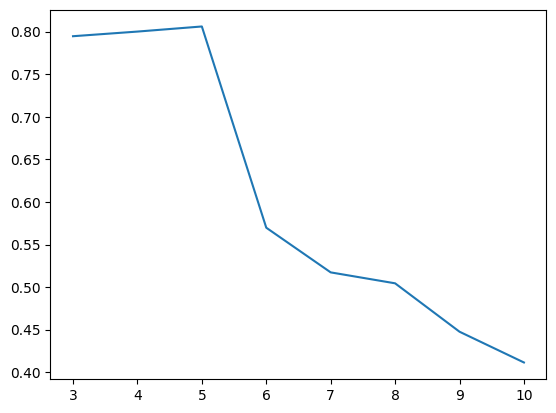

In [12]:
cluster_count = [i for i in range(3, 11)]
plt.plot(cluster_count, score, label='silhouette score')

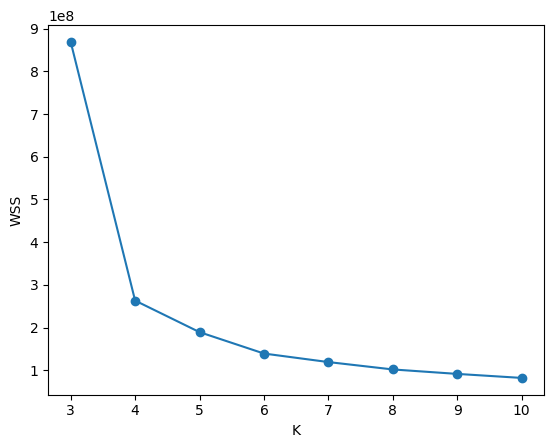

In [62]:
plt.plot([i for i in range(3, 11)], inertia_values, marker='o')
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

In [14]:
cluster_4 = clusters[1]
cluster_5 = clusters[2]
cluster_7 = clusters[4]
financial_info_label

518794    CA
567631    CA
269688    CA
375838    CB
558695    CA
          ..
318543    CE
694045    CA
865152    CA
764456    CE
297392    CB
Name: employment_status, Length: 55145, dtype: category
Categories (7, object): ['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG']

In [15]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(financial_info_label, cluster_4)

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(financial_info_label, cluster_4)

# Print the scores
print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: -0.04762564158114389
Normalized Mutual Information: 0.00837613373535739


In [16]:
# Calculate Adjusted Rand Index
ari = adjusted_rand_score(financial_info_label, cluster_5)

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(financial_info_label, cluster_5)

# Print the scores
print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: -0.048332236187632126
Normalized Mutual Information: 0.008487541343267142


In [17]:
# Calculate Adjusted Rand Index
ari = adjusted_rand_score(financial_info_label, cluster_7)

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(financial_info_label, cluster_7)

# Print the scores
print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: -0.016858999347655546
Normalized Mutual Information: 0.008820803230408018


## Checking for statistical significance for categprical splits

In [45]:
fin_not_fraud = not_fraud.loc[:, 
    [
        'income',
        'intended_balcon_amount',
        'payment_type',
        'employment_status',
        'credit_risk_score',
        'housing_status',
        'has_other_cards',
        'proposed_credit_limit',
        'customer_age' ## age related to financial status?
    ]
]

fin_not_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988971 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   income                  988971 non-null  float64 
 1   intended_balcon_amount  988971 non-null  float64 
 2   payment_type            988971 non-null  category
 3   employment_status       988971 non-null  category
 4   credit_risk_score       988971 non-null  int64   
 5   housing_status          988971 non-null  category
 6   has_other_cards         988971 non-null  category
 7   proposed_credit_limit   988971 non-null  float64 
 8   customer_age            988971 non-null  int64   
dtypes: category(4), float64(3), int64(2)
memory usage: 49.0 MB


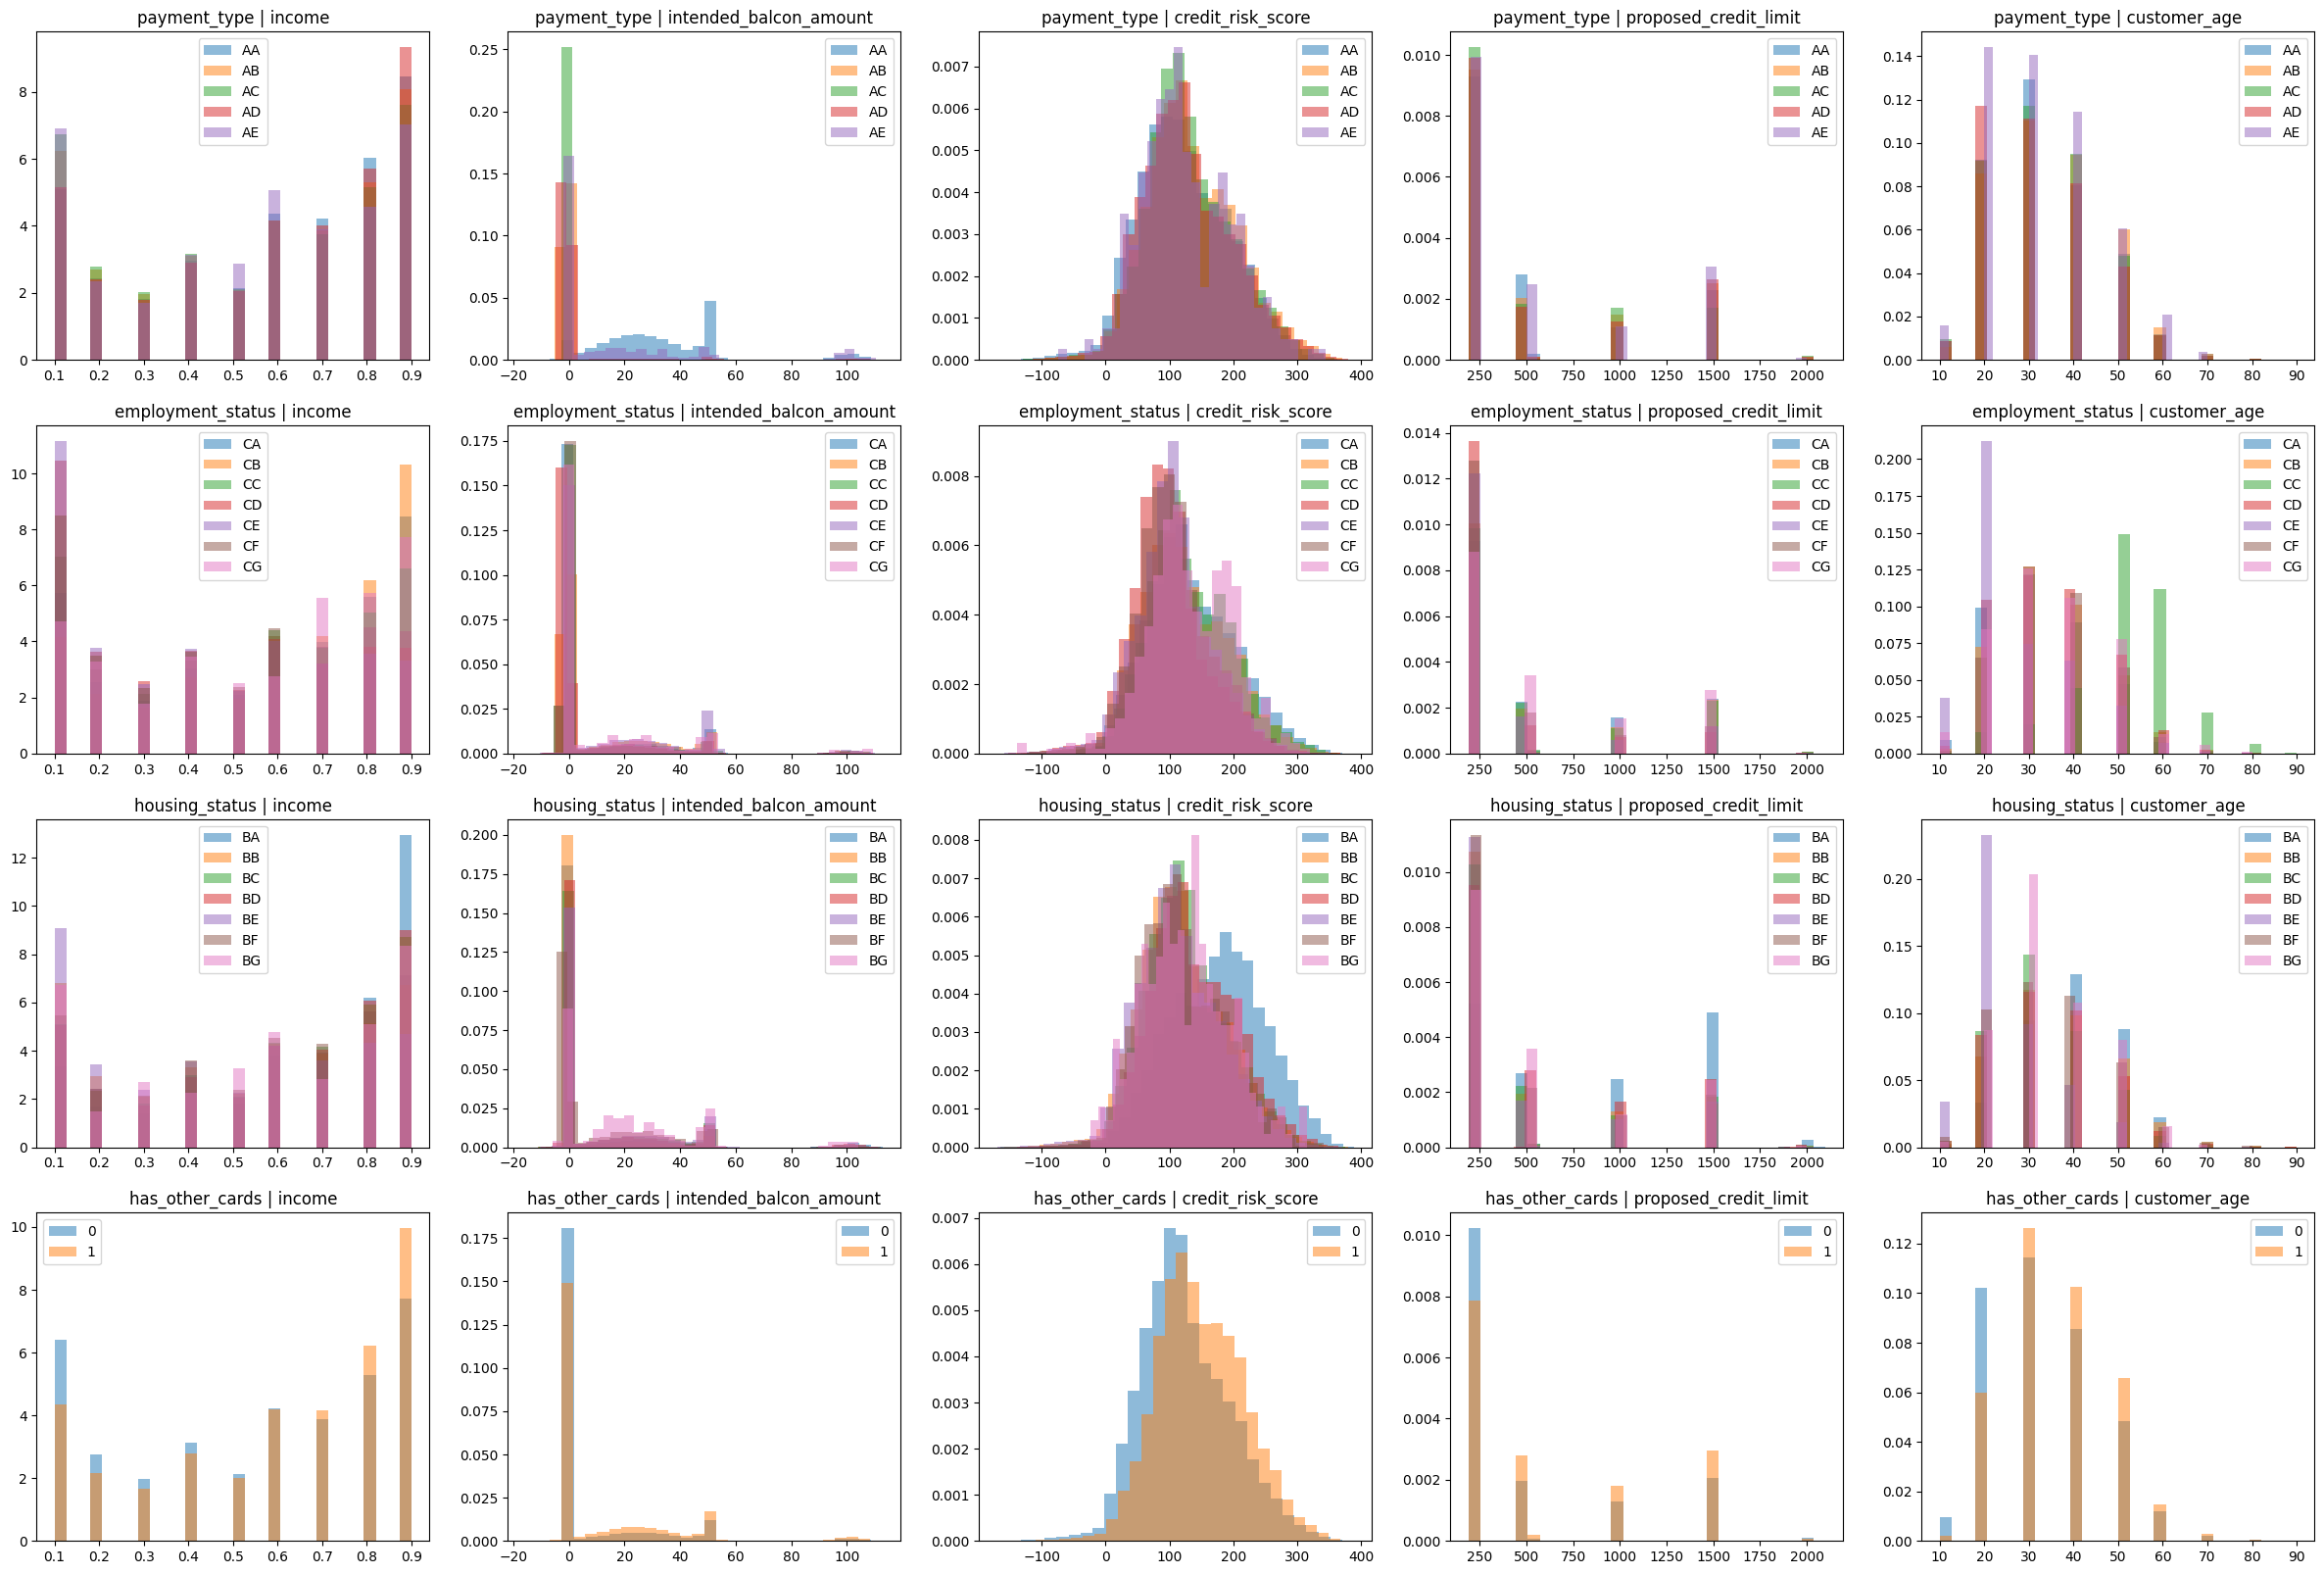

In [55]:
fin_not_fraud = not_fraud.loc[:, 
    [
        'income',
        'intended_balcon_amount',
        'payment_type',
        'employment_status',
        'credit_risk_score',
        'housing_status',
        'has_other_cards',
        'proposed_credit_limit',
        'customer_age' ## age related to financial status?
    ]
]

fin_cat = fin_not_fraud.select_dtypes(include=['category'])
fin_num = fin_not_fraud.select_dtypes(exclude=['category'])

plt.figure(figsize=(30, 5 * len(fin_cat.columns)))

# Each row - each caterogical variable
for i, cat_col_name in enumerate(fin_cat.columns):
    # Each column - each numerical variable
    for j, num_col_name in enumerate(fin_num.columns):

        # print(cat_col_name, "|", num_col_name)
        # group the numerical by the category
        grouped = fin_not_fraud.loc[:, 
            [
                num_col_name,
                cat_col_name
            ]
        ].groupby(cat_col_name)

        for group_name, group_data in grouped:
            # print(group_name, "|", num_col_name, "=", ((i * 5) + j + 1))
            plt.subplot(len(fin_cat.columns), len(fin_num.columns), ((i * 5) + j + 1))
            
            plt.title(f"{cat_col_name} | {num_col_name}")
            plt.hist(group_data[num_col_name], bins=30, alpha=0.5, label=str(group_name), density=True)
            plt.legend()

plt.show()

### Testing prediction models

In [ ]:
fin_not_fraud = not_fraud.loc[:, 
    [
        'payment_type',

        'income',
        'intended_balcon_amount',
        'employment_status',
        'credit_risk_score',
        'housing_status',
        'has_other_cards',
        'proposed_credit_limit',
        'customer_age' ## age related to financial status?
    ]
]

fin_cat = fin_not_fraud.select_dtypes(include=['category'])
fin_num = fin_not_fraud.select_dtypes(exclude=['category'])

In [57]:
fin_cat['employment_status']

0         CB
1         CA
2         CA
3         CA
4         CA
          ..
999995    CA
999996    CA
999997    CA
999998    CA
999999    CA
Name: employment_status, Length: 988971, dtype: category
Categories (7, object): ['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG']

### Log regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

for col in fin_cat.columns:

    print("Predicting:", col)
    X_train, X_test, y_train, y_test = train_test_split(fin_num, fin_cat[col], test_size=0.2, random_state=42)

    log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Predicting: payment_type


c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5830784397987816
Classification Report:


c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

          AA       0.94      0.86      0.89     51284
          AB       0.47      0.98      0.64     72969
          AC       0.02      0.00      0.00     49759
          AD       0.00      0.00      0.00     23734
          AE       0.00      0.00      0.00        49

    accuracy                           0.58    197795
   macro avg       0.29      0.37      0.31    197795
weighted avg       0.42      0.58      0.47    197795

Predicting: employment_status


c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7310245456154099
Classification Report:


c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

          CA       0.73      1.00      0.84    144521
          CB       0.33      0.00      0.00     27148
          CC       0.49      0.03      0.06      7339
          CD       0.00      0.00      0.00      5275
          CE       0.00      0.00      0.00      4595
          CF       0.00      0.00      0.00      8827
          CG       0.00      0.00      0.00        90

    accuracy                           0.73    197795
   macro avg       0.22      0.15      0.13    197795
weighted avg       0.60      0.73      0.62    197795

Predicting: housing_status


c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4179933769812179
Classification Report:


c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

          BA       0.44      0.32      0.37     32692
          BB       0.42      0.30      0.35     51748
          BC       0.41      0.74      0.53     73983
          BD       0.00      0.00      0.00      5177
          BE       0.59      0.06      0.11     33771
          BF       0.00      0.00      0.00       368
          BG       0.00      0.00      0.00        56

    accuracy                           0.42    197795
   macro avg       0.27      0.20      0.19    197795
weighted avg       0.44      0.42      0.37    197795

Predicting: has_other_cards
Accuracy: 0.7727900098586921
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87    153149
           1       0.41      0.02      0.03     44646

    accuracy                           0.77    197795
   macro avg       0.59      0.50      0.45    197795
weighted avg       0.69      0.77      0.68    1977

### Neural network

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


for col in fin_cat.columns:

    print("Predicting:", col)
    X_train, X_test, y_train, y_test = train_test_split(fin_num, fin_cat[col], test_size=0.2, random_state=42)
    # Encode labels (assuming y_train and y_test are label-encoded or one-hot encoded)
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Define the neural network architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(len(X_train.columns),)),
        Dense(64, activation='relu'),
        Dense(len(np.unique(fin_cat[col])), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
    print("Test Accuracy:", test_accuracy)

Predicting: payment_type
Epoch 1/10
22252/22252 [==============================] - 23s 1ms/step - loss: 1.0746 - accuracy: 0.5746 - val_loss: 0.8937 - val_accuracy: 0.6033
Epoch 2/10
22252/22252 [==============================] - 23s 1ms/step - loss: 0.8857 - accuracy: 0.6053 - val_loss: 0.8886 - val_accuracy: 0.6034
Epoch 3/10
22252/22252 [==============================] - 23s 1ms/step - loss: 0.8798 - accuracy: 0.6057 - val_loss: 0.8832 - val_accuracy: 0.6041
Epoch 4/10
22252/22252 [==============================] - 23s 1ms/step - loss: 0.8787 - accuracy: 0.6057 - val_loss: 0.8805 - val_accuracy: 0.6041
Epoch 5/10
22252/22252 [==============================] - 23s 1ms/step - loss: 0.8781 - accuracy: 0.6058 - val_loss: 0.8795 - val_accuracy: 0.6042
Epoch 6/10
22252/22252 [==============================] - 23s 1ms/step - loss: 0.8781 - accuracy: 0.6059 - val_loss: 0.8820 - val_accuracy: 0.6039
Epoch 7/10
22252/22252 [==============================] - 23s 1ms/step - loss: 0.8779 - accur

In [63]:
fin_not_fraud = not_fraud.loc[:, 
    [
        'income',
        'intended_balcon_amount',
        'payment_type',
        'employment_status',
        'credit_risk_score',
        'housing_status',
        'has_other_cards',
        'proposed_credit_limit',
        'customer_age' ## age related to financial status?
    ]
]

fin_fraud = fraud.loc[:,
    [
        'income',
        'intended_balcon_amount',
        'payment_type',
        'employment_status',
        'credit_risk_score',
        'housing_status',
        'has_other_cards',
        'proposed_credit_limit',
        'customer_age' ## age related to financial status?
    ]
]


fin_not_fraud_cat = fin_not_fraud.select_dtypes(include=['category'])
fin_not_fraud_num = fin_not_fraud.select_dtypes(exclude=['category'])
fin_fraud_cat = fin_fraud.select_dtypes(include=['category'])
fin_fraud_num = fin_fraud.select_dtypes(exclude=['category'])

for col in fin_cat.columns:

    print("Predicting:", col)
    X_train = fin_not_fraud_num
    X_test = fin_fraud_num
    y_train = fin_not_fraud_cat[col]
    y_test = fin_fraud_cat[col]

    # Encode labels (assuming y_train and y_test are label-encoded or one-hot encoded)
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Define the neural network architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(len(X_train.columns),)),
        Dense(64, activation='relu'),
        Dense(len(np.unique(fin_cat[col])), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
    print("Test Accuracy:", test_accuracy)

Predicting: payment_type
Epoch 1/10
27815/27815 [==============================] - 28s 996us/step - loss: 1.0391 - accuracy: 0.5810 - val_loss: 0.9404 - val_accuracy: 0.5841
Epoch 2/10
27815/27815 [==============================] - 26s 922us/step - loss: 0.8789 - accuracy: 0.6072 - val_loss: 0.9410 - val_accuracy: 0.5844
Epoch 3/10
27815/27815 [==============================] - 26s 918us/step - loss: 0.8740 - accuracy: 0.6075 - val_loss: 0.9329 - val_accuracy: 0.5843
Epoch 4/10
27815/27815 [==============================] - 27s 976us/step - loss: 0.8729 - accuracy: 0.6076 - val_loss: 0.9321 - val_accuracy: 0.5846
Epoch 5/10
27815/27815 [==============================] - 28s 999us/step - loss: 0.8722 - accuracy: 0.6076 - val_loss: 0.9310 - val_accuracy: 0.5846
Epoch 6/10
27815/27815 [==============================] - 29s 1ms/step - loss: 0.8718 - accuracy: 0.6076 - val_loss: 0.9313 - val_accuracy: 0.5844
Epoch 7/10
27815/27815 [==============================] - 32s 1ms/step - loss: 0.87